In [1]:
from DataLoader import  DataLoader
from utils import *
from visualization import *
from models.unet import UNet
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.debugging.set_log_device_placement(True)
dl = DataLoader()


Using TensorFlow backend.


Num GPUs Available:  1


In [2]:
train_df, valid_df = dl.train_split(0.2, filterNan=True)
print("train set shape", train_df.shape)
print("validation set shape", valid_df.shape)

train set shape (3801, 5)
validation set shape (951, 5)


In [3]:
grouped_images_gen = dl.get_grouped_images_gen(train_df)#, f="adaptive_equalization") # applying filters increases dramatically the execution time
aug_gen = get_augmented_images_generator(grouped_images_gen)
valid_x, valid_y = next(dl.get_grouped_images_gen(valid_df, batch_size=500))#, f="adaptive_equalization")) #valid_df.shape[0]))

In [4]:
t_x, t_y = next(aug_gen)
t_x = t_x[:9]
t_y = t_y[:9]

unet_model = UNet(t_x.shape[1:])
unet_model.compile()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
RGB_Input (InputLayer)          (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 256, 256, 3)  0           RGB_Input[0][0]                  
__________________________________________________________________________________________________
batch_n

/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [ ]:
hl = unet_model.validate(aug_gen, train_df.shape[0], valid_set=(valid_x, valid_y), epochs=2)
unet_model.show_loss(hl)


Epoch 1/2
100/200 [==============>...............] - ETA: 1:31 - loss: -0.0054 - dice_coef: 0.0106 - binary_accuracy: 0.0097 

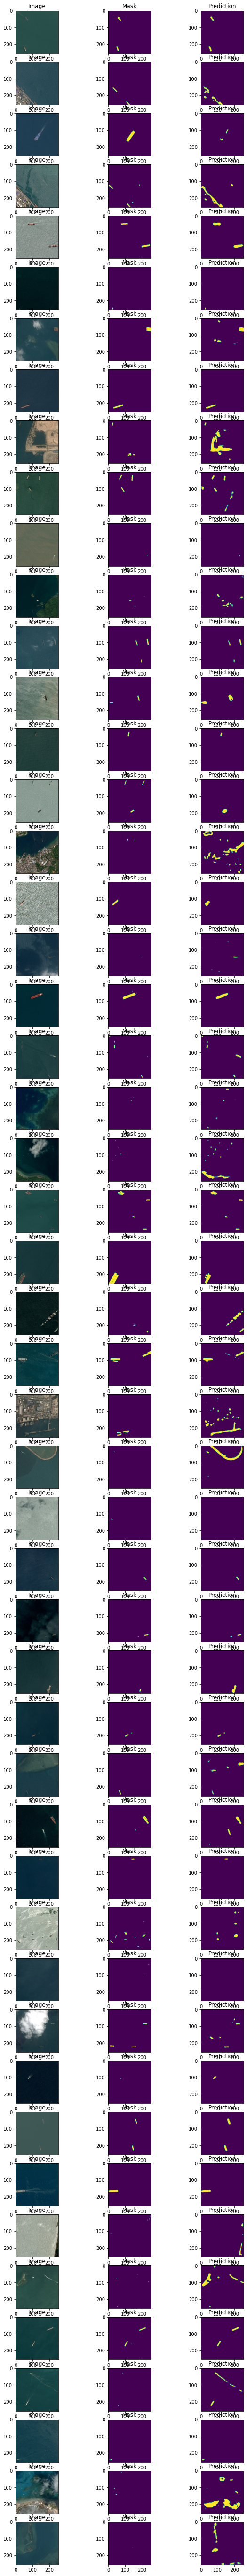

In [6]:
fig, m_axs = plt.subplots(50, 3, figsize = (10, 100))
for i, (ax1, ax2, ax3) in enumerate(m_axs):
    test_img = np.expand_dims(valid_x[i], 0)
    y = unet_model.infer(test_img)
    ax1.imshow(valid_x[i])
    ax1.set_title('Image')
    ax2.imshow(valid_y[i])
    ax2.set_title('Mask')
    ax3.imshow(y[0, :, :, 0], vmin = 0, vmax = 1)
    ax3.set_title('Prediction')
plt.show()

In [1]:
import gc
gc.collect()

124

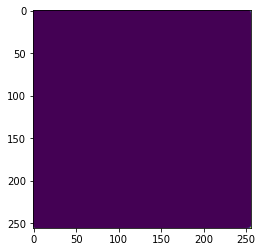

In [8]:
plt.imshow(y[0])